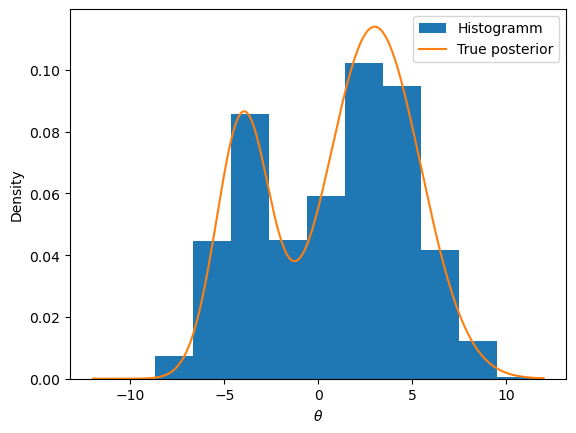

In [7]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
a, b = 10, 10

N = 100
k = 61

prior = stats.beta(a, b)
likelihood = lambda thetas: 0.3*norm(-4, np.sqrt(2)).pdf(thetas) + 0.7*norm(3, np.sqrt(6)).pdf(thetas)
thetas = np.linspace(0, 1, 200)
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)
def value(theta, **kwargs):
    _ = kwargs
    if theta < -12 or theta > 12:
        return 0
    else:
        return likelihood(theta)
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]
post = metroplis(0, value, proposal, 3000, sigma=3)
x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)


fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(post, density=True, label='Histogramm')
plt.plot(x, y, label='True posterior')
plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.show()

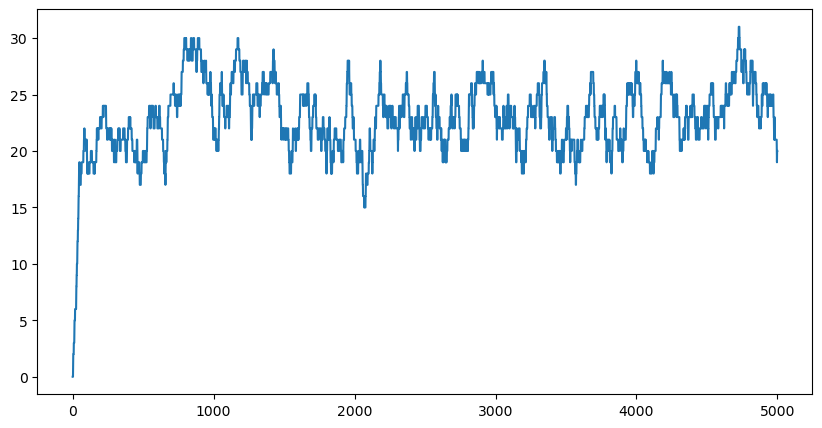

Expected value
23.392


In [9]:
def step_graf_2(start_graph, i, j):
    
    if start_graph[i][j] == 0:
        if start_graph[i][j+1] != 1 and start_graph[i][j-1] != 1 and start_graph[i+1][j] != 1 and start_graph[i-1][j] != 1:
            p = np.random.randint(2)
            if p == 1:
                start_graph[i][j] = 1
                return 1
                
    if start_graph[i][j] == 1:
        p = np.random.randint(2)
        if p == 0:
            start_graph[i][j] = 0
            return 2
        
    return 0
graph_2 = np.zeros((12,12))
N = 0
sam_power = 100000
weight_2 = np.zeros(sam_power)
while N < sam_power:
    number_0 = np.random.randint(1,11)
    number_1 = np.random.randint(1,11)
    step_graf_2(graph_2,number_0,number_1)
    weight_2[N] = graph_2.sum()
    N = N + 1
np.unique(weight_2, return_counts=True)


fig = plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(weight_2[:5000])
plt.show()

print("Expected value")
print(np.mean(weight_2[200::400]))